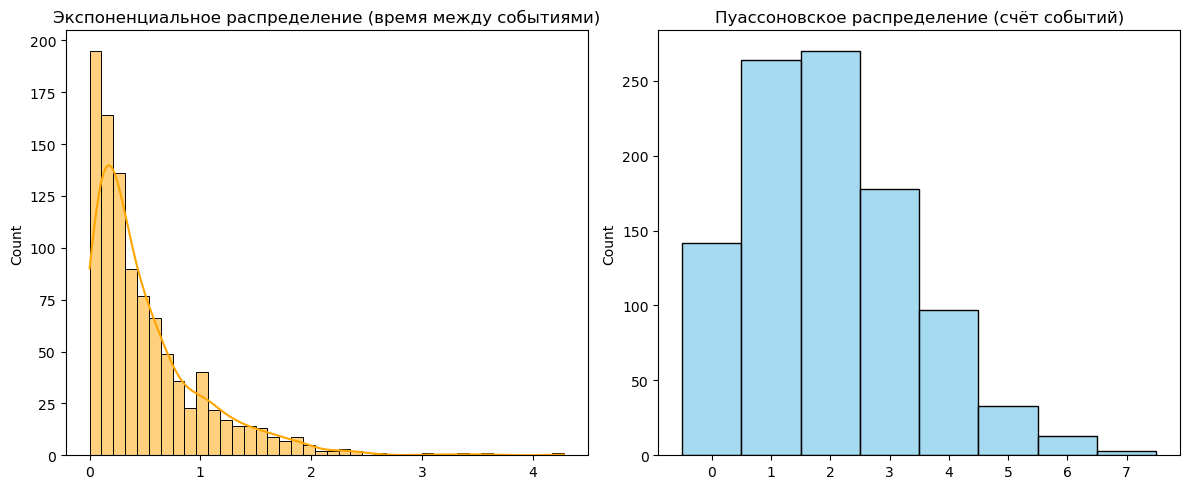

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
lambda_ = 2

# Время между событиями (экспоненциальное)
exp_samples = np.random.exponential(scale=1/lambda_, size=1000)

# Кол-во событий за 1 единицу времени (пуассоновское)
pois_samples = np.random.poisson(lam=lambda_, size=1000)

# График
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(exp_samples, bins=40, kde=True, color='orange')
plt.title("Экспоненциальное распределение (время между событиями)")

plt.subplot(1, 2, 2)
sns.histplot(pois_samples, bins=range(0, max(pois_samples)+1), kde=False, discrete=True, color='skyblue')
plt.title("Пуассоновское распределение (счёт событий)")

plt.tight_layout()
plt.show()

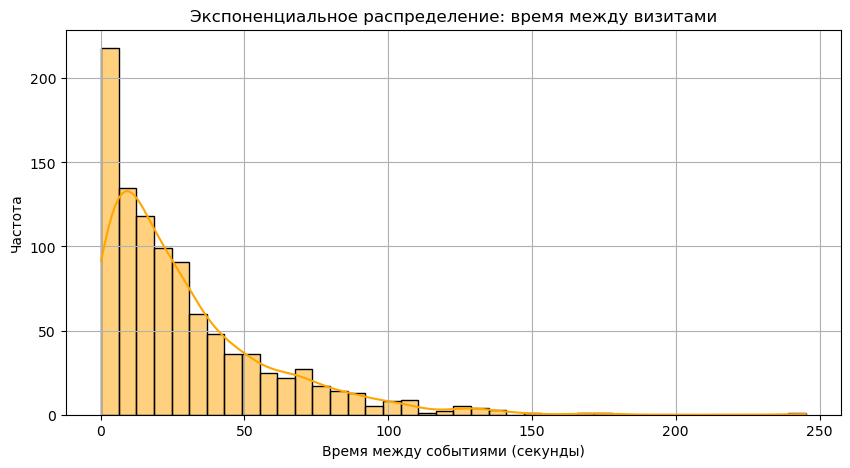

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

# Средний интервал между визитами = 30 сек → λ = 1 / 30
lambda_ = 1 / 30

# Генерация 1000 "времён между посещениями"
times_between = np.random.exponential(scale=1/lambda_, size=1000)

# Построим гистограмму
plt.figure(figsize=(10, 5))
sns.histplot(times_between, bins=40, kde=True, color='orange')
plt.title("Экспоненциальное распределение: время между визитами")
plt.xlabel("Время между событиями (секунды)")
plt.ylabel("Частота")
plt.grid()
plt.show()

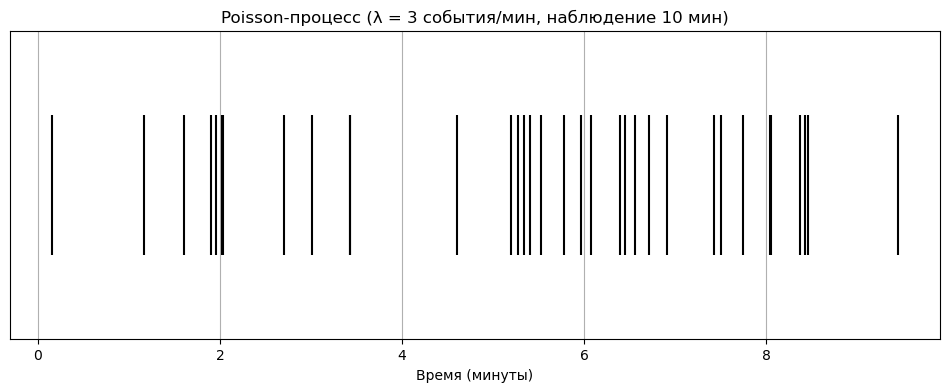

In [3]:
# Импорт библиотек
import numpy as np
import matplotlib.pyplot as plt

# Установка параметров процесса
np.random.seed(42)
lambda_rate = 3  # λ: среднее число событий в единицу времени (например, 3 события в минуту)
T = 10           # общее время наблюдения (в минутах)

# Генерация времени между событиями (экспоненциальное распределение)
inter_arrival_times = np.random.exponential(scale=1/lambda_rate, size=1000)

# Кумулятивное суммирование — получаем моменты наступления событий
event_times = np.cumsum(inter_arrival_times)

# Оставим только те события, которые произошли за время T
event_times = event_times[event_times <= T]

# Визуализация Poisson-процесса
plt.figure(figsize=(12, 4))
plt.eventplot(event_times, orientation='horizontal', colors='black')
plt.title(f"Poisson-процесс (λ = {lambda_rate} события/мин, наблюдение {T} мин)")
plt.xlabel("Время (минуты)")
plt.yticks([])
plt.grid(True)
plt.show()

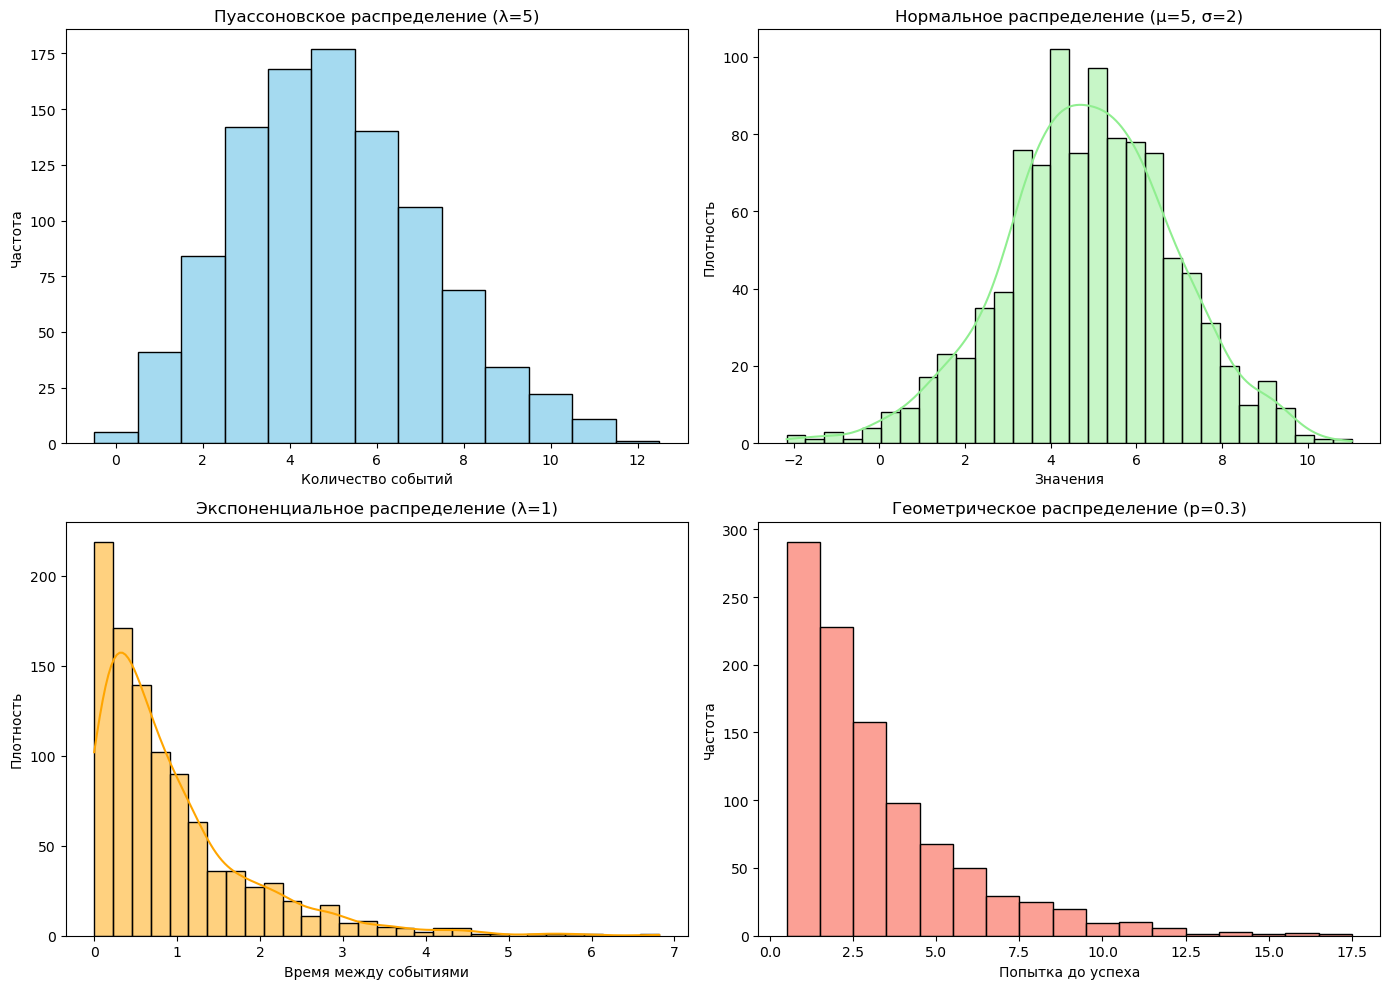

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson, norm, expon, geom

# Настройки
np.random.seed(42)
n = 1000

# Данные
lambda_poisson = 5
mu_normal, sigma_normal = 5, 2
lambda_expon = 1
p_geom = 0.3

# Сэмплирование
data_poisson = np.random.poisson(lam=lambda_poisson, size=n)
data_normal = np.random.normal(loc=mu_normal, scale=sigma_normal, size=n)
data_expon = np.random.exponential(scale=1/lambda_expon, size=n)
data_geom = np.random.geometric(p=p_geom, size=n)

# Построение графиков
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Пуассон
sns.histplot(data_poisson, bins=range(0, max(data_poisson)+1), kde=False, discrete=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title("Пуассоновское распределение (λ=5)")
axs[0, 0].set_xlabel("Количество событий")
axs[0, 0].set_ylabel("Частота")

# Нормальное
sns.histplot(data_normal, bins=30, kde=True, ax=axs[0, 1], color='lightgreen')
axs[0, 1].set_title("Нормальное распределение (μ=5, σ=2)")
axs[0, 1].set_xlabel("Значения")
axs[0, 1].set_ylabel("Плотность")

# Экспоненциальное
sns.histplot(data_expon, bins=30, kde=True, ax=axs[1, 0], color='orange')
axs[1, 0].set_title("Экспоненциальное распределение (λ=1)")
axs[1, 0].set_xlabel("Время между событиями")
axs[1, 0].set_ylabel("Плотность")

# Геометрическое
sns.histplot(data_geom, bins=range(1, max(data_geom)+1), kde=False, discrete=True, ax=axs[1, 1], color='salmon')
axs[1, 1].set_title("Геометрическое распределение (p=0.3)")
axs[1, 1].set_xlabel("Попытка до успеха")
axs[1, 1].set_ylabel("Частота")

plt.tight_layout()
plt.show()

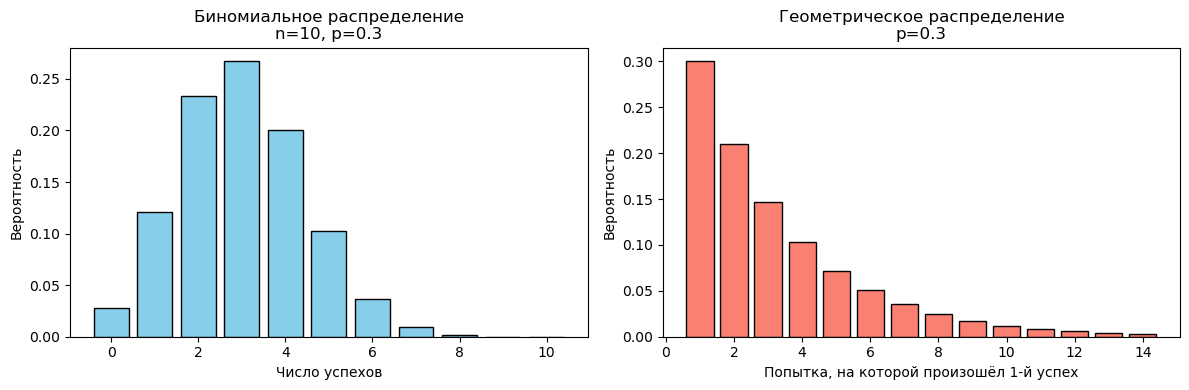

In [5]:
# Повторно импортируем библиотеки после сброса состояния окружения
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom, geom

# Параметры
p = 0.3  # вероятность успеха
n = 10   # количество испытаний для биномиального

# Значения X
x_binom = np.arange(0, n+1)
x_geom = np.arange(1, 15)

# Распределения
binom_pmf = binom.pmf(x_binom, n, p)
geom_pmf = geom.pmf(x_geom, p)

# Построение графиков
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Биномиальное
ax[0].bar(x_binom, binom_pmf, color='skyblue', edgecolor='black')
ax[0].set_title(f'Биномиальное распределение\nn={n}, p={p}')
ax[0].set_xlabel('Число успехов')
ax[0].set_ylabel('Вероятность')

# Геометрическое
ax[1].bar(x_geom, geom_pmf, color='salmon', edgecolor='black')
ax[1].set_title(f'Геометрическое распределение\np={p}')
ax[1].set_xlabel('Попытка, на которой произошёл 1-й успех')
ax[1].set_ylabel('Вероятность')

plt.tight_layout()
plt.show()

Слева: **Биномиальное распределение**

• Описывает, сколько успехов произойдёт за n=10 попыток \
• Пример: из 10 email-рассылок, сколько откроют при вероятности успеха p=0.3 \
• Распределение напоминает колокол, центр вокруг n * p = 3


Справа: **Геометрическое распределение**

• Описывает, на какой попытке произойдёт первый успех \
• Пример: сколько раз надо позвонить клиенту, прежде чем он ответит при p=0.3 \
• Распределение убывает: максимальная вероятность у первой попытки, потом всё меньше